In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [49]:
x = np.array([-2, 0, 4, 2]).reshape(-1,1)
y = np.array([1, 0.3, -1, 0]).reshape(-1,1)

x_test = np.linspace(-5, 5, 100).reshape(-1,1)

kernel = RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

samples = gp.sample_y(x_test, 3)
print samples.shape

#gp.fit(x, y)
#opt_params = gp.get_params()
#print "Opt param", opt_params

#log_lik = gp.log_marginal_likelihood()

# Make the prediction on the meshed x-axis (ask for MSE as well)
#y_pred, sigma = gp.predict(x_test, return_std=True)


(100, 3)


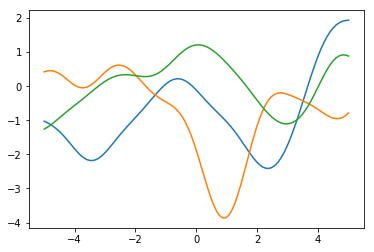

In [50]:

fig = plt.figure();
plt.plot(x_test, samples[:,0]);
plt.plot(x_test, samples[:,1]);
plt.plot(x_test, samples[:,2]);
#plt.fill_between(x_test, y_pred - 2*sigma, y_pred + 2*sigma, color="#dddddd")

In [55]:
x2_train = x_test
y2_train = samples[:,0]

kernel2 = RBF(10, (1e-2, 1e2))
print kernel2.theta
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=9, alpha=1e-06)
gp2 = gp2.fit(x2_train, y2_train)
opt_params = gp2.get_params()
print opt_params

[2.30258509]
{'kernel': RBF(length_scale=10), 'optimizer': 'fmin_l_bfgs_b', 'copy_X_train': True, 'random_state': None, 'kernel__length_scale_bounds': (0.01, 100.0), 'kernel__length_scale': 10, 'n_restarts_optimizer': 9, 'alpha': 1e-06, 'normalize_y': False}


In [61]:
print gp2.kernel_.theta

[2.30258509]


In [60]:
np.exp(gp2.kernel_.theta)

array([0.99109409])

In [ ]:
//TODO: try different kernels with the our data
    check the available kernels. How hyperparameters influence behaviour